<a href="https://colab.research.google.com/github/BNarayanaReddy/ML_Minor/blob/main/PCA_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import seaborn as sns

In [3]:
height = np.random.normal(loc = 160, size=50).reshape(-1, 1)
weight = np.random.normal(loc = 60, size=50).reshape(-1, 1)
bmi = weight/(height/100)**2


In [4]:
X = np.concatenate([height, weight, bmi], axis = 1)


In [5]:
X.shape

(50, 3)

In [6]:
# sns.scatterplot(X)

In [7]:
mean = np.mean(X, axis = 0)
mean

array([160.12271631,  59.82164248,  23.33563572])

In [8]:
std = np.std(X, axis = 0)
std

array([1.11477713, 0.70468513, 0.43796175])

In [9]:
# Standardization
X = (X-mean)/(std)

In [10]:
# X

In [11]:
cov_mat = (X.T @ X)/(X.shape[0]) # 1/m * (x.T x)
cov_mat

array([[ 1.        , -0.0583358 , -0.77696883],
       [-0.0583358 ,  1.        ,  0.67367863],
       [-0.77696883,  0.67367863,  1.        ]])

In [12]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals, eig_vecs

(array([2.05766998e+00, 9.42256481e-01, 7.35339171e-05]),
 array([[-0.53821393,  0.65473562,  0.53070428],
        [ 0.47369559,  0.75581469, -0.45205823],
        [ 0.69709272, -0.00808824,  0.71693537]]))

In [13]:
# Sort the eigen vecs
comps = np.argsort(eig_vals)[::-1]
comps

array([0, 1, 2])

In [14]:
components = np.array([eig_vecs[:,i] for i in comps])
components

array([[-0.53821393,  0.47369559,  0.69709272],
       [ 0.65473562,  0.75581469, -0.00808824],
       [ 0.53070428, -0.45205823,  0.71693537]])

In [15]:
# sns.scatterplot(components[0])
eig_vals

array([2.05766998e+00, 9.42256481e-01, 7.35339171e-05])

In [16]:
X.shape

(50, 3)

In [17]:
import matplotlib.pyplot as plt

In [18]:
X_projected1 = X @ components[0]
X_projected2 = X @ components[1]


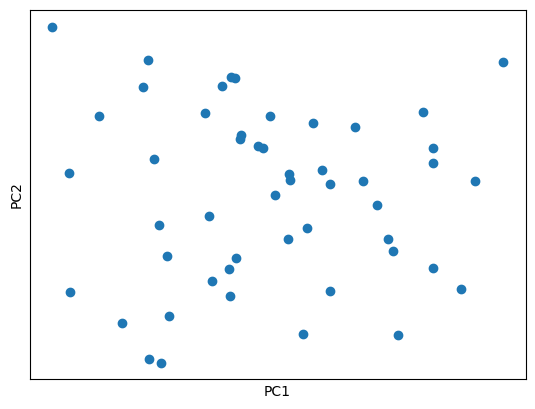

In [19]:

plt.scatter(X_projected1, X_projected2)

plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()

Transformed data shape: (50, 2)


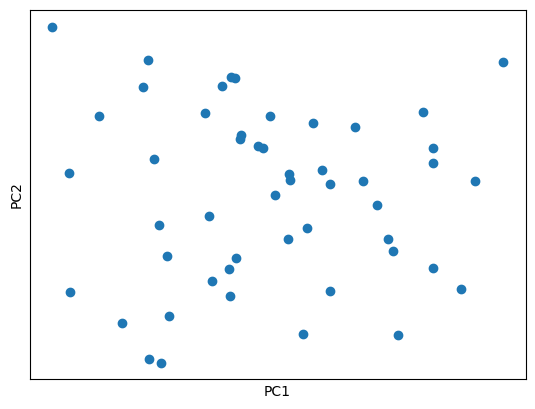

In [20]:
# Verify using SKLearn inbuilt function

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X)

X_pca = pca.transform(X)
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()


In [21]:
# Sign adjustment for the eign vectors is required to perform:
# Hence when the eigen values and vectors found in using numpy library would result in orientation of transformed by exact 180 degrees when compared to sklearn transformation.
# it does not affect the interpretation or the usefulness of PCA with this orientation
# The direction (sign) of the components does not matter for the variance captured, which is the primary goal of PCA.
# For consistency most ML experts use the sign adustment(not me)